In [4]:
%pylab inline

import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [5]:
# To stop potential randomness
seed = 42
rng = np.random.RandomState(seed)

In [6]:
emergency_vehicles = glob('../datasets/emergency_classification/images/Emergency/*.jpg')
nonemergency_vehicles = glob('../datasets/emergency_classification/images/Non-Emergency/*.jpg')

In [7]:
len(emergency_vehicles), len(nonemergency_vehicles)

(991, 1361)

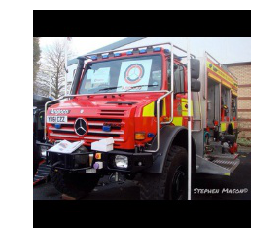

In [8]:
img_name = rng.choice(emergency_vehicles)

img = imread(img_name)

pylab.imshow(img)
pylab.axis('off')
pylab.show()

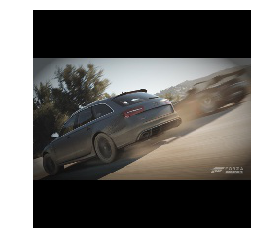

In [9]:
img_name = rng.choice(nonemergency_vehicles)

img = imread(img_name)

pylab.imshow(img)
pylab.axis('off')
pylab.show()

In [10]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [11]:
data.head()

,emergency_or_not,images
0,1,images/Emergency/emergency_1072.jpg
1,1,images/Emergency/emergency_1208.jpg
2,1,images/Emergency/emergency_1625.jpg
3,1,images/Emergency/emergency_1437.jpg
4,1,images/Emergency/emergency_1454.jpg


In [9]:
images = []
for img_loc in data.images:
    img = image.load_img('../datasets/emergency_classification/' + img_loc)
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [11]:
images=preprocess_input(images, mode='tf')

In [12]:
model = VGG16(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model

features_x=model.predict(images)

In [13]:
features_x.shape

(2352, 7, 7, 512)

In [14]:
features_x /= features_x.max()

In [15]:
train_x = features_x.reshape(2352,7*7*512)
train_y = data.emergency_or_not.values

In [16]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [17]:
model=Sequential()
model.add(Dense(units=1, input_dim=25088, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [18]:
model.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/20
1646/1646 [==============================] - 1s 350us/step - loss: 0.6237 - acc: 0.6367 - val_loss: 0.5740 - val_acc: 0.7989
Epoch 2/20
1646/1646 [==============================] - 0s 162us/step - loss: 0.5050 - acc: 0.8414 - val_loss: 0.5083 - val_acc: 0.7663
Epoch 3/20
1646/1646 [==============================] - 0s 158us/step - loss: 0.4239 - acc: 0.8366 - val_loss: 0.4531 - val_acc: 0.8159
Epoch 4/20
1646/1646 [==============================] - 0s 130us/step - loss: 0.3807 - acc: 0.8651 - val_loss: 0.4259 - val_acc: 0.8201
Epoch 5/20
1646/1646 [==============================] - 0s 114us/step - loss: 0.3470 - acc: 0.8712 - val_loss: 0.4020 - val_acc: 0.8286
Epoch 6/20
1646/1646 [==============================] - 0s 114us/step - loss: 0.3249 - acc: 0.8779 - val_loss: 0.3860 - val_acc: 0.8343
Epoch 7/20
1646/1646 [==============================] - 0s 115us/step - loss: 0.3031 - acc: 0.8955 - val_loss: 0.3718 - val_acc: 0.8385
E

In [19]:
predictions = model.predict_classes(X_valid).ravel()
prediction_probabilities = model.predict(X_valid).ravel()
all_vehicles = np.array(emergency_vehicles + nonemergency_vehicles)

_, valid_vehicles, _, valid_y = train_test_split(all_vehicles,train_y,test_size=0.3, random_state=42)

58 % sure that it is emergency


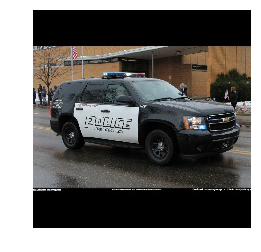

In [20]:
correct_predictions = valid_vehicles[predictions == Y_valid]

index = rng.choice(range(len(correct_predictions)))
img_name = correct_predictions[index]


prob = (prediction_probabilities[predictions == Y_valid] * 100).astype(int)[index]

img = imread(img_name)

print(prob , '% sure that it is emergency')
pylab.imshow(img)
pylab.axis('off')
pylab.show()

21 % sure that it is emergency


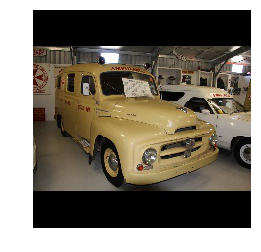

In [21]:
incorrect_predictions = valid_vehicles[predictions != Y_valid]
index = rng.choice(range(len(incorrect_predictions)))
img_name = incorrect_predictions[index]


prob = (prediction_probabilities[predictions != Y_valid] * 100).astype(int)[index]

img = imread(img_name)

print(prob , '% sure that it is emergency')
pylab.imshow(img)
pylab.axis('off')
pylab.show()

In [4]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________